In [3]:
#Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading data from the local

In [4]:
df = pd.read_csv('C://Users/rajal/KPMG_Forage/train.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [3]:
#Null values
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [5]:
#Replacing null value with most frequent value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df = pd.DataFrame(imp.fit_transform(df),columns=df.columns,index=df.index)

In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  object
 1   workclass        43957 non-null  object
 2   fnlwgt           43957 non-null  object
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  object
 5   marital-status   43957 non-null  object
 6   occupation       43957 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  object
 11  capital-loss     43957 non-null  object
 12  hours-per-week   43957 non-null  object
 13  native-country   43957 non-null  object
 14  income_>50K      43957 non-null  object
dtypes: object(15)
memory usage: 5.0+ MB


In [14]:
#Converting the categorical data to nominal data
print(df.workclass.unique(),
df.education.unique(),
df.occupation.unique(),
df.relationship.unique(),
df.race.unique(),
df.gender.unique())

['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay'] ['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm'] ['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces'] ['Not-in-family' 'Own-child' 'Husband' 'Wife' 'Unmarried' 'Other-relative'] ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] ['Male' 'Female']


In [15]:
from sklearn.preprocessing import LabelEncoder
def encoding_schema(df, cat, label):
    
    '''Function to generate the encoding scheme for categorical data and 
        write back labels to the DataFrame
    '''
    gle = LabelEncoder()
    cat_labels = gle.fit_transform(df[cat])
    cat_mappings = {index: label for index, label in enumerate(gle.classes_)}
    
    df[label] = cat_labels.astype('int64')
    
    return ('Labels for {} are {}'.format(cat, cat_mappings))

In [16]:
encoding_schema(df, 'workclass', 'workclassLabel')

"Labels for workclass are {0: 'Federal-gov', 1: 'Local-gov', 2: 'Never-worked', 3: 'Private', 4: 'Self-emp-inc', 5: 'Self-emp-not-inc', 6: 'State-gov', 7: 'Without-pay'}"

In [17]:
encoding_schema(df, 'education', 'educationLabel')

"Labels for education are {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}"

In [18]:
encoding_schema(df, 'marital-status', 'marital-statusLabel')

"Labels for marital-status are {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}"

In [19]:
encoding_schema(df, 'occupation', 'occupationLabel')

"Labels for occupation are {0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-house-serv', 9: 'Prof-specialty', 10: 'Protective-serv', 11: 'Sales', 12: 'Tech-support', 13: 'Transport-moving'}"

In [20]:
encoding_schema(df, 'relationship', 'relationshipLabel')

"Labels for relationship are {0: 'Husband', 1: 'Not-in-family', 2: 'Other-relative', 3: 'Own-child', 4: 'Unmarried', 5: 'Wife'}"

In [21]:
encoding_schema(df, 'race', 'raceLabel')

"Labels for race are {0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}"

In [22]:
encoding_schema(df, 'gender', 'genderLabel')

"Labels for gender are {0: 'Female', 1: 'Male'}"

In [23]:
encoding_schema(df, 'native-country', 'countryLabel')

"Labels for native-country are {0: 'Cambodia', 1: 'Canada', 2: 'China', 3: 'Columbia', 4: 'Cuba', 5: 'Dominican-Republic', 6: 'Ecuador', 7: 'El-Salvador', 8: 'England', 9: 'France', 10: 'Germany', 11: 'Greece', 12: 'Guatemala', 13: 'Haiti', 14: 'Holand-Netherlands', 15: 'Honduras', 16: 'Hong', 17: 'Hungary', 18: 'India', 19: 'Iran', 20: 'Ireland', 21: 'Italy', 22: 'Jamaica', 23: 'Japan', 24: 'Laos', 25: 'Mexico', 26: 'Nicaragua', 27: 'Outlying-US(Guam-USVI-etc)', 28: 'Peru', 29: 'Philippines', 30: 'Poland', 31: 'Portugal', 32: 'Puerto-Rico', 33: 'Scotland', 34: 'South', 35: 'Taiwan', 36: 'Thailand', 37: 'Trinadad&Tobago', 38: 'United-States', 39: 'Vietnam', 40: 'Yugoslavia'}"

In [29]:
columns_to_keep  = ['age','workclassLabel','fnlwgt','educationLabel','educational-num','marital-statusLabel',
                    'occupationLabel','relationshipLabel','raceLabel','genderLabel','capital-gain','capital-loss',
                    'hours-per-week','countryLabel','income_>50KLabel']

df = df[columns_to_keep]

In [30]:
old_colnames  = ['workclassLabel','educationLabel','educational-num','marital-statusLabel',
                    'occupationLabel','relationshipLabel','raceLabel','genderLabel','capital-gain','capital-loss',
                    'hours-per-week','countryLabel','income_>50KLabel']

new_colnames  = ['workclass','education','educational_num','marital_status',
                    'occupation','relationship','race','gender','capital_gain','capital_loss',
                    'hours_per_week','native_country','income_crossing_limit']

col_rename_dict = {i:j for i,j in zip(old_colnames,new_colnames)}
df = df.rename(columns=col_rename_dict)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    43957 non-null  object
 1   workclass              43957 non-null  int64 
 2   fnlwgt                 43957 non-null  object
 3   education              43957 non-null  int64 
 4   educational_num        43957 non-null  object
 5   marital_status         43957 non-null  int64 
 6   occupation             43957 non-null  int64 
 7   relationship           43957 non-null  int64 
 8   race                   43957 non-null  int64 
 9   gender                 43957 non-null  int64 
 10  capital_gain           43957 non-null  object
 11  capital_loss           43957 non-null  object
 12  hours_per_week         43957 non-null  object
 13  native_country         43957 non-null  int64 
 14  income_crossing_limit  43957 non-null  int64 
dtypes: int64(9), object

In [35]:
df=df.astype({'age': np.int64, 'educational_num':np.int64,
                'capital_gain':float,'capital_loss':float, 'hours_per_week':float})

In [36]:
df.shape

(43957, 15)

In [37]:
df.dtypes

age                        int64
workclass                  int64
fnlwgt                    object
education                  int64
educational_num            int64
marital_status             int64
occupation                 int64
relationship               int64
race                       int64
gender                     int64
capital_gain             float64
capital_loss             float64
hours_per_week           float64
native_country             int64
income_crossing_limit      int64
dtype: object

# Analyzing Data

In [38]:
set_option('precision', 3)
df.describe()

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_crossing_limit
count,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000,43957.000
mean,38.617,3.098,10.284,10.074,2.618,5.756,1.443,3.668,0.669,1093.560,88.246,40.408,36.424,0.239
std,13.734,1.108,3.879,2.575,1.507,4.012,1.601,0.846,0.471,7570.536,404.588,12.400,6.041,0.427
min,17.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,28.000,3.000,9.000,9.000,2.000,2.000,0.000,4.000,0.000,0.000,0.000,40.000,38.000,0.000
50%,37.000,3.000,11.000,10.000,2.000,6.000,1.000,4.000,1.000,0.000,0.000,40.000,38.000,0.000
75%,48.000,3.000,12.000,12.000,4.000,9.000,3.000,4.000,1.000,0.000,0.000,45.000,38.000,0.000
max,90.000,7.000,15.000,16.000,6.000,13.000,5.000,4.000,1.000,99999.000,4356.000,99.000,40.000,1.000


In [39]:
df.groupby(['income_crossing_limit']).size()

income_crossing_limit
0    33439
1    10518
dtype: int64

# Visualization

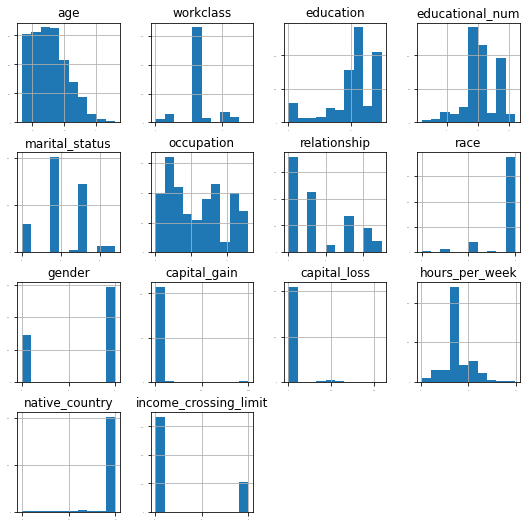

In [40]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(9,9))
plt.show();

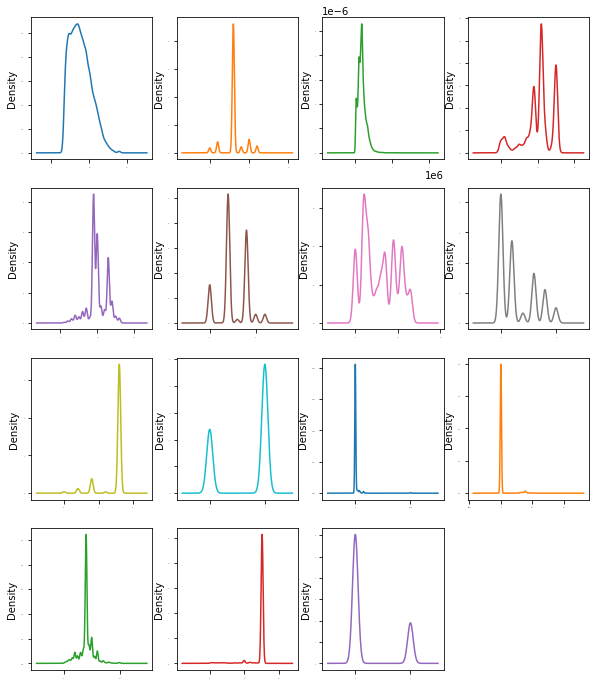

In [43]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show();

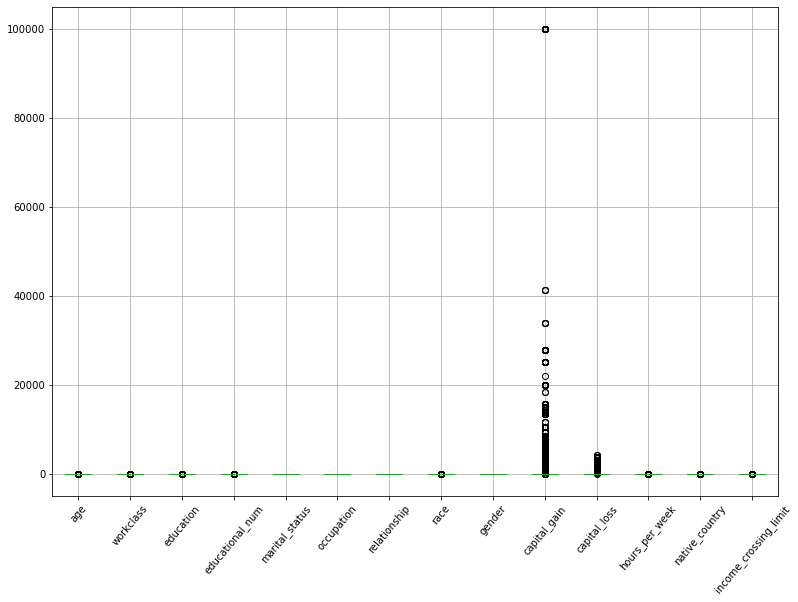

In [44]:
boxplot = df.boxplot(column=['age','workclass','education','educational_num','marital_status','occupation','relationship',
                             'race','gender','capital_gain','capital_loss','hours_per_week','native_country',
                             'income_crossing_limit'
                             ], figsize=(13, 9), rot=50)

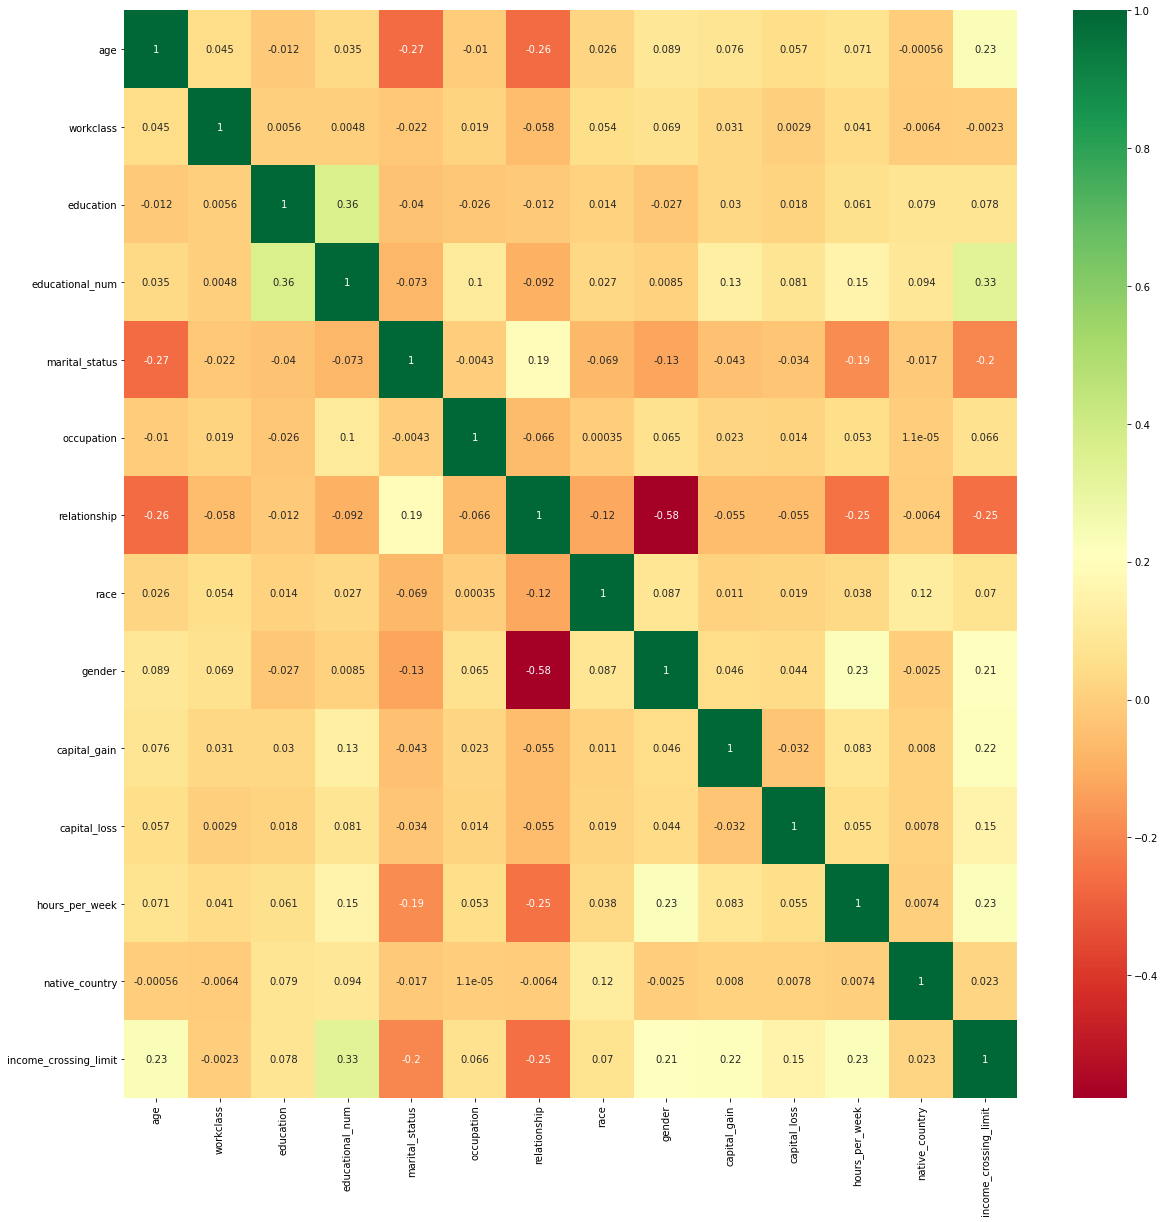

In [45]:
#Co-relation
import seaborn as sns

X = df.iloc[:,1:12]  #independent column
y = df.iloc[:,12]    #target column

# get correlations of each features in dataset
corrmat = df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn");

# Validation Dataset

In [ ]:
df['income_crossing_limit'] = df.income_crossing_limit.replace({0: 'N', 1: 'Y'})

In [52]:
array = df.values
X = array[:, 1:12].astype(float)
Y = array[:, -1]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=None)

In [53]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [54]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [56]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.799993 (0.005255)
KNN: 0.776886 (0.006879)
CART: 0.809029 (0.008682)
NB: 0.794988 (0.007274)
SVM: 0.798889 (0.007103)


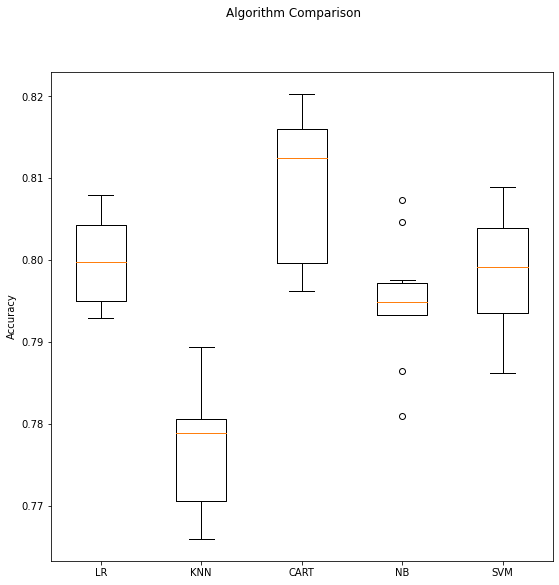

In [57]:
fig = plt.figure(figsize=(9,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show();

In [59]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.821704 (0.007277)
ScaledKNN: 0.828432 (0.006785)
ScaledCART: 0.809451 (0.008764)
ScaledNB: 0.800254 (0.007466)
ScaledSVM: 0.846697 (0.006625)


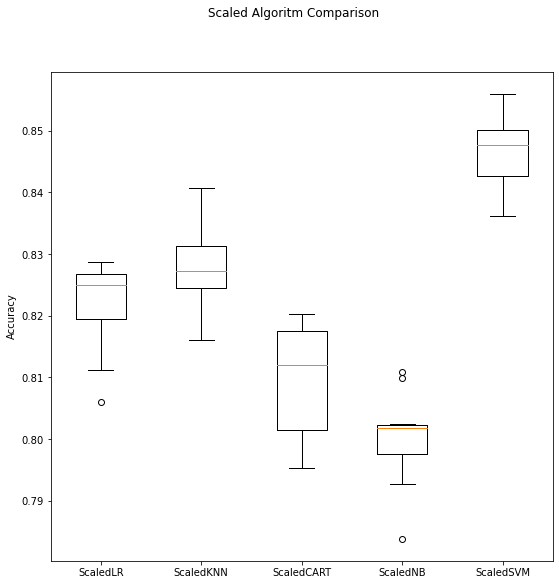

In [60]:
fig = plt.figure(figsize=(9,9))
fig.suptitle("Scaled Algoritm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show();

# SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.001, 0.01, 0.1, 1, 10]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean Test Score: %f, STD (%f) with: %r" % (mean, stdev, param))

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC()
model.fit(rescaledX, Y_train)

# estimate accuarcy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print('Accuracy Score:',round(accuracy_score(Y_validation, predictions), 2));